In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import Birch
from scipy.stats import multivariate_normal

In [125]:
df = pd.read_csv('./reduced_datasets/NGC_1261_reduced.csv')
df = df.dropna()
print(df.shape)
df.head()

(8028, 4)


,X_t,Y_t,pm_alpha,pm_delta
0,-0.000140,0.000015,0.510462,-2.532855
1,-0.000119,0.000314,-1.176504,-0.746229
5,-0.000058,0.000619,0.036115,-0.254968
6,-0.000611,-0.000388,0.358778,-1.837191
7,0.000535,0.000513,0.397324,-2.293263


In [126]:
scaler = RobustScaler()
X = scaler.fit_transform(df)

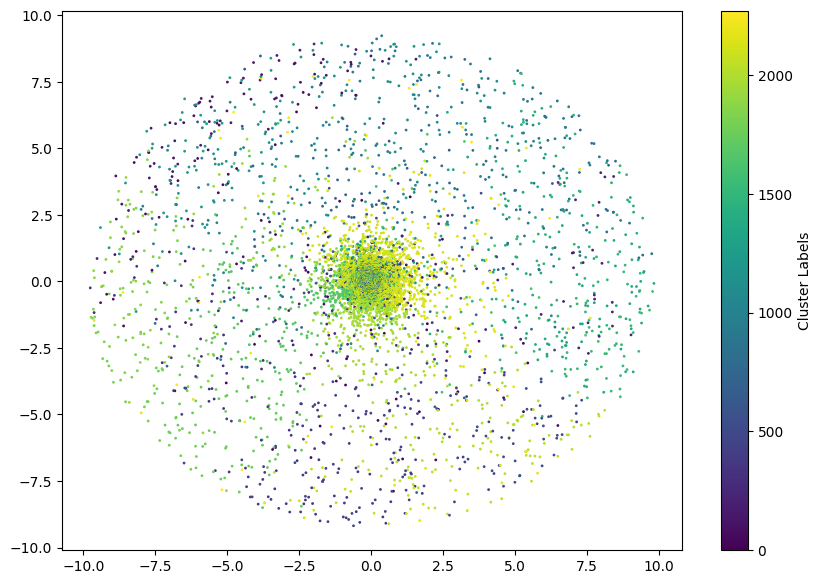

In [127]:
birch_model = Birch(n_clusters=None, threshold=0.5)
birch_model.fit(X)
labels = birch_model.predict(X)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=1)
plt.colorbar(scatter, label='Cluster Labels')

plt.show()

In [128]:
unique_labels = np.unique(labels)
gaussian_parameters = {}
selected = np.ones(X.shape[0], dtype=bool)

for label in unique_labels:
    cluster_points = X[labels == label]
    
    mean = np.mean(cluster_points, axis=0)
    cov_matrix = np.cov(cluster_points, rowvar=False)
    
    # move on if cluster too small or matrix singular
    if cluster_points.shape[0] < 4 or np.linalg.det(cov_matrix) == 0:
        selected[labels == label] = False
        continue
    
    cov_inv = np.linalg.inv(cov_matrix)

    for i, point in enumerate(cluster_points):

        diff = point - mean
        mahalanobis_dist = np.sqrt(np.dot(np.dot(diff.T, cov_inv), diff))
        
        # step 5 : delete if outside 3 sigma ellipsoid
        if mahalanobis_dist > 3:
            global_idx = np.where((X == point).all(axis=1))[0][0]
            selected[global_idx] = False 
            
    gaussian_parameters[label] = {
        'mean': mean,
        'cov': cov_matrix
    }

sum(selected)

C:\Users\boris\AppData\Local\Temp\ipykernel_5176\1629943960.py:21: RuntimeWarning: invalid value encountered in sqrt
  mahalanobis_dist = np.sqrt(np.dot(np.dot(diff.T, cov_inv), diff))


5354

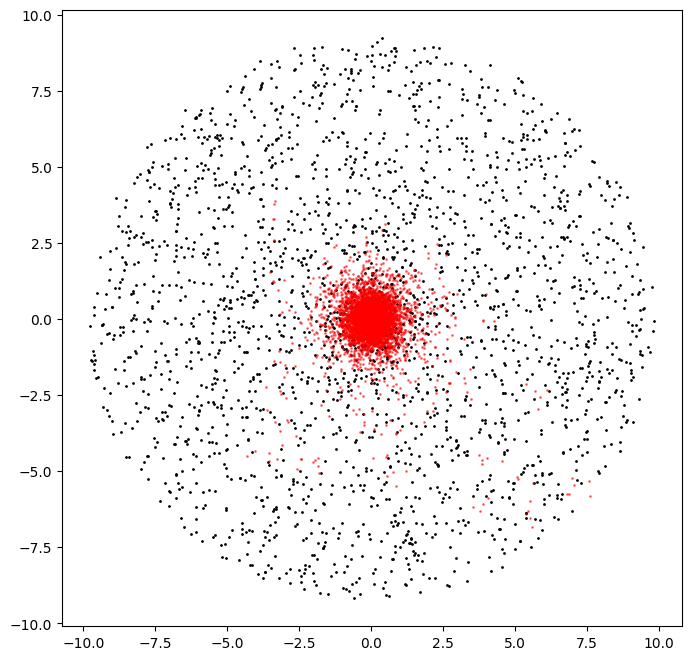

In [129]:

plt.figure(figsize=(8,8))
plt.scatter(X[~selected, 0], X[~selected, 1], s = 1, c = 'k')
plt.scatter(X[selected, 0], X[selected, 1], s = 1, c = 'r', alpha = 0.5)

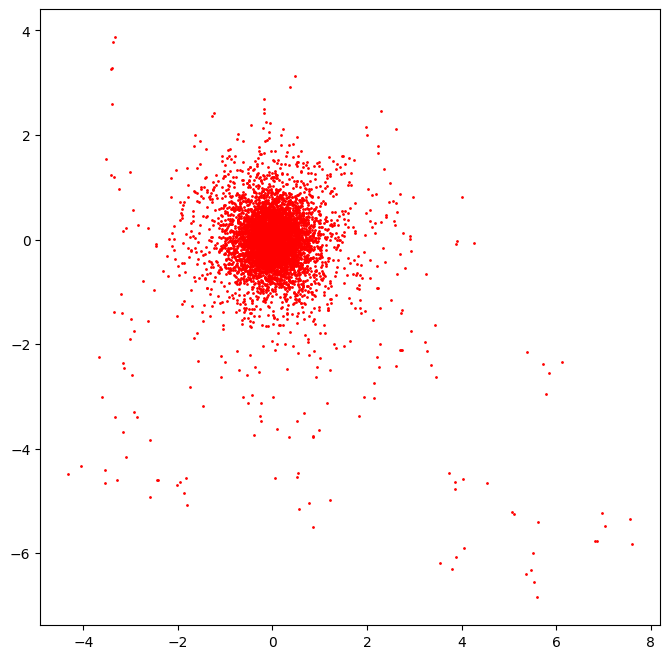

In [130]:
plt.figure(figsize=(8,8))
plt.scatter(X[selected, 0], X[selected, 1], s = 1, c = 'r')